# Analyse exploratoire des données principales

Ce notebook présente une première exploration du fichier `application_train.csv` du projet de credit scoring.

**Objectifs :**
- Comprendre la structure des données
- Identifier les variables clés et les valeurs manquantes
- Visualiser la distribution de la variable cible et des variables principales
- Formuler des premières hypothèses pour la préparation des données

In [2]:
# Import des librairies
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

## **Exploration globale du jeu de données.**

### **Chargement des données**

In [3]:
trainset = pd.read_csv(r'C:\Users\dell\Desktop\Project\data\application_train.csv')
trainset.shape

(307511, 122)

Le jeu de données contient 307 511 lignes (clients) et 122 colonnes (caractéristiques).

Chaque ligne représente une demande de crédit avec ses attributs associés.

In [4]:
# pprint(df.columns[:100].tolist())
#col = trainset.columns[:122].tolist()
#col
# enregistrer sous forme de fichier texte col
#with open(r'C:\Users\dell\Desktop\Project\data\col.txt', 'w') as f:
 #   for item in col:
  #      f.write("%s\n" % item)


### **Aperçu des données**

Affichons les premières lignes du jeu de données.

In [5]:
trainset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### **Analyse descriptive des valeurs manquantes**

Cette étape est cruciale pour déterminer quelles variables pourront être utilisées directement et 
lesquelles nécessiteront un traitement (imputation ou suppression) avant la modélisation.

In [6]:
# 1. Compter les valeurs nulles pour chaque colonne et trier par ordre décroissant
valeurs_manquantes = trainset.isnull().sum().sort_values(ascending=False)
# 2. Calculer le pourcentage de valeurs manquantes pour chaque colonne
pourcentage_manquantes = (valeurs_manquantes / len(trainset)) * 100
# 3. Créer un DataFrame pour afficher les résultats, en filtrant uniquement les colonnes avec valeurs manquantes
df_valeurs_manquantes = pd.DataFrame({
    'Valeurs Manquantes': valeurs_manquantes[valeurs_manquantes > 0], 
    'Pourcentage de NA': pourcentage_manquantes[valeurs_manquantes > 0]
})


In [7]:
# le nombre de colonnes avec des valeurs manquantes
print(f"Le nombre de colonnes avec des valeurs manquantes est de : {len(df_valeurs_manquantes)}")


Le nombre de colonnes avec des valeurs manquantes est de : 67


    interpretation

In [8]:
# 4. Afficher les 20 premières colonnes ayant des valeurs manquantes
df_valeurs_manquantes[df_valeurs_manquantes['Valeurs Manquantes'] > 0].head(60)

,Valeurs Manquantes,Pourcentage de NA
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


L'analyse des valeurs manquantes révèle plusieurs points importants :

De nombreuses variables liées aux caractéristiques immobilières (COMMONAREA, NONLIVINGAPARTMENTS, etc.) présentent plus de 65% de valeurs manquantes, les rendant peu fiables pour l'analyse. Ces variables ne seront pas retenues dans notre modèle.

Les variables avec suffixe _AVG, _MODE et _MEDI sont systématiquement incomplètes avec des taux similaires, suggérant qu'elles proviennent d'une même source de données fragmentaire.

EXT_SOURCE_1 (56.4% manquants) et EXT_SOURCE_3 (19.8% manquants) sont des scores externes reconnus comme prédictifs dans le scoring crédit. Malgré ses lacunes, EXT_SOURCE_3 sera conservé car son taux de complétion reste acceptable.

OCCUPATION_TYPE (31.3% manquants) représente une information métier pertinente qu'on conservera avec une imputation appropriée.

Les variables AMT_REQ_CREDIT_BUREAU_* (13.5% manquants) fournissent un historique précieux des consultations de crédit et seront conservées après imputation.

Les variables avec moins de 1% de valeurs manquantes (NAME_TYPE_SUITE, variables _SOCIAL_CIRCLE) seront facilement complétées.

On va donc éliminer toutes les variables avec plus de 50% de valeurs manquantes, à l'exception d'EXT_SOURCE_2 qui est complète et très prédictive selon la littérature du domaine. Cette approche permettra de construire un modèle robuste basé sur des données fiables.

### **Première sélection de variables**

Suite à l'analyse des valeurs manquantes et en nous basant sur le fichier **HomeCredit_columns_description.csv**, nous avons sélectionné les variables pertinentes pour notre modèle selon quatre critères principaux :

1. **Pertinence métier** : variables ayant un lien direct avec la capacité de remboursement ou le profil de risque du client
2. **Disponibilité** : variables bien renseignées avec peu de valeurs manquantes
3. **Non-redondance** : éviter les variables fortement corrélées entre elles (à approfondir avec une analyse de corrélation)
4. **Explicabilité** : variables facilement compréhensibles pour les conseillers et clients

Notre sélection comprend :

- **Données socio-démographiques** : genre, nombre d'enfants, situation familiale, niveau d'éducation, type de logement, taille du foyer, âge

- **Situation professionnelle** : type de revenu, métier, revenu total, ancienneté dans l'emploi, secteur d'activité

- **Informations sur le crédit** : montant demandé, annuité, prix du bien financé, type de prêt

- **Scores externes** : EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 (reconnus comme très prédictifs)

- **Autres indicateurs pertinents** : possession de voiture/bien immobilier, contacts fournis, scores régionaux, historique des demandes de crédit

Nous allons écarté les variables avec plus de 60% de valeurs manquantes (notamment les variables *_AVG, *_MODE, *_MEDI), les variables techniques peu informatives (FLAG_DOCUMENT_*) ainsi que les variables redondantes ou difficilement explicables au client final.

In [9]:
# Récupération des variables pertinentes selon notre analyse
variables_pertinentes = [
    'SK_ID_CURR', 'TARGET',  # Identifiant et variable cible
    # Données socio-démographiques
    'CODE_GENDER', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
    'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 
    # Situation professionnelle et revenus
    'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL',
    'DAYS_EMPLOYED', 'ORGANIZATION_TYPE', 
    # Informations sur le crédit demandé
    'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'NAME_CONTRACT_TYPE', 
    # Scores externes
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
    # Historique et stabilité
    'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    # Indicateurs de contact
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL', 
    # Variables régionales
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
    # Historique de crédit
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Création d'un nouveau DataFrame avec uniquement les variables pertinentes
trainset_v1 = trainset[variables_pertinentes]
print(f"Dimensions du DataFrame original: {trainset.shape}")
print(f"Dimensions du DataFrame après sélection: {trainset_v1.shape}")

Dimensions du DataFrame original: (307511, 122)
Dimensions du DataFrame après sélection: (307511, 38)


### **Analyse descriptive de notre nouveau dataset**

Nous allons maintenant explorer notre dataset réduit contenant uniquement les variables pertinentes sélectionnées. Cette analyse nous permettra de mieux comprendre la distribution des données, d'identifier d'éventuelles anomalies et de préparer les étapes de prétraitement nécessaires avant la modélisation. Elle nous aidera également à déterminer si nous pouvons encore réduire le nombre de variables pour obtenir un modèle plus parcimonieux tout en conservant une bonne performance prédictive.


In [10]:
# Définition des fonctions d'analyse descriptive pour faciliter l'exploration
def afficher_info_dataset(df, titre="Informations générales du dataset"):
    """
    Affiche les informations générales d'un DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le DataFrame à analyser
    titre : str, default="Informations générales du dataset"
        Le titre à afficher avant les informations
        
    Returns:
    --------
    None
        Affiche les dimensions du DataFrame et le nombre de valeurs manquantes par colonne
    """
    print(f"\n{titre}")
    print(f"Dimensions: {df.shape}")
    
    # Nombre de valeurs manquantes par colonne présantant des valeurs manquantes
    na_counts = df.isna().sum()
    na_cols = na_counts[na_counts > 0]
    
    if len(na_cols) > 0:
        print(f"\nNombre de valeurs manquantes par colonne présantant des valeurs manquantes:")
        for col, count in na_cols.items():
            print(f"- {col}: {count} ({count/len(df)*100:.2f}%)")
    else:
        print("Aucune valeur manquante dans le dataset")
    
def analyser_valeurs_manquantes(df, seuil=0.05):
    """
    Affiche les colonnes avec un pourcentage de valeurs manquantes supérieur au seuil défini.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Le DataFrame à analyser
    seuil : float, default=0.05
        Le seuil (proportion) à partir duquel une colonne est considérée comme ayant trop de valeurs manquantes
        
    Returns:
    --------
    None
        Affiche la liste des colonnes dépassant le seuil de valeurs manquantes avec leur pourcentage
    """
    na_percent = df.isna().mean().sort_values(ascending=False)
    colonnes_na = na_percent[na_percent > seuil]
    
    if len(colonnes_na) > 0:
        print(f"\nColonnes avec plus de {seuil*100}% de valeurs manquantes:")
        for col, pct in colonnes_na.items():
            print(f"- {col}: {pct*100:.2f}%")
    else:
        print(f"\nAucune colonne avec plus de {seuil*100}% de valeurs manquantes")

def analyser_distribution_cible(df):
    """
    Analyse la distribution de la variable cible (TARGET) dans le DataFrame.
       
    Parameters:
    -----------
    df : pandas.DataFrame
        Le DataFrame contenant la variable cible 'TARGET'
        
    Returns:
    --------
    None
        Affiche la distribution de la variable cible avec les pourcentages de chaque classe
        et le ratio entre les classes
    """
    if 'TARGET' in df.columns:
        print("\nDistribution de la variable cible:")
        target_counts = df['TARGET'].value_counts(normalize=True)
        print(f"- Classe 0 (Non-défaut): {target_counts[0]*100:.2f}%")
        print(f"- Classe 1 (Défaut): {target_counts[1]*100:.2f}%")
        print(f"- Proportion: {target_counts[0]/target_counts[1]:.2f} non-défauts pour 1 défaut")

In [11]:
# Analyse du dataset sélectionné
afficher_info_dataset(trainset_v1, "Analyse descriptive de notre nouveau dataset trainset_v1")


Analyse descriptive de notre nouveau dataset trainset_v1
Dimensions: (307511, 38)

Nombre de valeurs manquantes par colonne présantant des valeurs manquantes:
- CNT_FAM_MEMBERS: 2 (0.00%)
- OCCUPATION_TYPE: 96391 (31.35%)
- AMT_ANNUITY: 12 (0.00%)
- AMT_GOODS_PRICE: 278 (0.09%)
- EXT_SOURCE_1: 173378 (56.38%)
- EXT_SOURCE_2: 660 (0.21%)
- EXT_SOURCE_3: 60965 (19.83%)
- OWN_CAR_AGE: 202929 (65.99%)
- AMT_REQ_CREDIT_BUREAU_HOUR: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_DAY: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_WEEK: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_MON: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_QRT: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_YEAR: 41519 (13.50%)


trainset_v1 contient 307,511 lignes et 38 colonnes, ce qui représente un volume de données conséquent.
 
 Points importants concernant les valeurs manquantes:
 - Deux variables présentent un taux très élevé de valeurs manquantes: **OWN_CAR_AGE (66%) et EXT_SOURCE_1 (56%)**
 - **OCCUPATION_TYPE** manque pour près d'un tiers des clients (31%)
 - Les variables liées au bureau de crédit (AMT_REQ_CREDIT_BUREAU_*) ont toutes exactement 13.5% de valeurs manquantes
 - **EXT_SOURCE_3**, qui est un score externe important, manque pour 20% des clients

Ces valeurs manquantes devront être traitées avec attention lors de la modélisation, soit par imputation, 
soit en créant des indicateurs de valeurs manquantes, soit en excluant certaines variables trop incomplètes.



In [12]:
analyser_valeurs_manquantes(trainset_v1, 0.1)


Colonnes avec plus de 10.0% de valeurs manquantes:
- OWN_CAR_AGE: 65.99%
- EXT_SOURCE_1: 56.38%
- OCCUPATION_TYPE: 31.35%
- EXT_SOURCE_3: 19.83%
- AMT_REQ_CREDIT_BUREAU_YEAR: 13.50%
- AMT_REQ_CREDIT_BUREAU_QRT: 13.50%
- AMT_REQ_CREDIT_BUREAU_MON: 13.50%
- AMT_REQ_CREDIT_BUREAU_WEEK: 13.50%
- AMT_REQ_CREDIT_BUREAU_DAY: 13.50%
- AMT_REQ_CREDIT_BUREAU_HOUR: 13.50%


##### Analyse descriptive des valeurs manquantes dans le dataset **trainset_v1**

Basé sur les résultats ci-dessus, nous pouvons identifier plusieurs variables problématiques:

##### Variables à écarter:

1. **OWN_CAR_AGE (65.99% de valeurs manquantes)**: 
   - Description: Âge de la voiture du client
   - Justification: Avec près de 66% de valeurs manquantes, cette variable n'est pas fiable pour la modélisation. De plus, elle n'est pertinente que pour les clients possédant une voiture.

2. **EXT_SOURCE_1 (56.38% de valeurs manquantes)**:
   - Description: Score externe normalisé provenant d'une source de données externe
   - Justification: Plus de la moitié des observations manquent cette information, ce qui rendrait l'imputation peu fiable.

 3. **OCCUPATION_TYPE (31.35% de valeurs manquantes)**:
    - Description: Type d'occupation/emploi du client
    - Justification: Malgré que près d'un tiers des clients n'ont pas cette information renseignée, cette variable peut être conservée car elle pourrait apporter une information pertinente sur le profil professionnel du client. Nous pouvons créer une catégorie spécifique pour les valeurs manquantes ou utiliser des techniques d'imputation appropriées.

##### Variables à considérer avec précaution:

1. **EXT_SOURCE_3 (19.83% de valeurs manquantes)**:
   - Description: Score externe normalisé provenant d'une source de données externe
   - Considération: Bien que présentant un taux significatif de valeurs manquantes, cette variable pourrait être conservée avec une stratégie d'imputation appropriée ou en créant un indicateur de valeur manquante.

2. **Variables AMT_REQ_CREDIT_BUREAU_* (toutes à 13.50% de valeurs manquantes)**:
   - Description: Nombre de demandes au bureau de crédit sur différentes périodes (heure, jour, semaine, mois, trimestre, année)
   - Considération: Ces variables présentent un taux modéré mais identique de valeurs manquantes, suggérant un problème systématique dans la collecte de ces données. Nous pourrions soit les traiter ensemble, soit créer un indicateur de disponibilité de ces informations.

### Variables avec peu de valeurs manquantes (à conserver):

- **CNT_FAM_MEMBERS, AMT_ANNUITY, AMT_GOODS_PRICE, EXT_SOURCE_2**: Ces variables ont moins de 1% de valeurs manquantes et peuvent être facilement imputées ou les observations concernées peuvent être supprimées sans impact significatif sur le modèle.



##### **Analyse de la distribution de la variable cible (TARGET)**

In [13]:
analyser_distribution_cible(trainset_v1)


Distribution de la variable cible:
- Classe 0 (Non-défaut): 91.93%
- Classe 1 (Défaut): 8.07%
- Proportion: 11.39 non-défauts pour 1 défaut


L'analyse de la distribution de notre variable cible révèle un déséquilibre important entre les classes:

- **Classe 0 (Non-défaut)**: 91.93% des clients remboursent correctement leur crédit
- **Classe 1 (Défaut)**: Seulement 8.07% des clients sont en situation de défaut de paiement
- **Proportion**: Pour chaque client en défaut, nous avons environ 11.39 clients qui remboursent normalement

Ce déséquilibre est typique dans les problèmes de détection de fraude ou de défaut de crédit, mais il représente un défi important pour notre modélisation. En effet, un modèle naïf qui prédirait systématiquement "non-défaut" atteindrait déjà une précision de 91.93%, sans pour autant être utile pour identifier les clients à risque.

Nous devrons donc adopter des stratégies appropriées lors de la modélisation pour gérer ce déséquilibre (comme l'échantillonnage équilibré, la pondération des classes ou l'utilisation de métriques adaptées comme l'AUC ou le F1-score).


In [14]:
# On passe maintenant à l'étape d'écarter les variables problématiques que nous avons identifiées précédemment
# Nous supprimons OWN_CAR_AGE (66% de valeurs manquantes) et EXT_SOURCE_1 (56.38% de valeurs manquantes)
# Ces variables ont trop de données manquantes pour être utilisées de manière fiable dans notre modèle
trainset_v2 = trainset_v1.drop(columns=['OWN_CAR_AGE', 'EXT_SOURCE_1'])
print(f"Dimensions du DataFrame après élimination des variables problématiques: {trainset_v2.shape}")
pprint(trainset_v2.columns)

Dimensions du DataFrame après élimination des variables problématiques: (307511, 36)
Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'CNT_CHILDREN',
       'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'CNT_FAM_MEMBERS', 'DAYS_BIRTH', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'ORGANIZATION_TYPE', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_CONTRACT_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


In [15]:
# on fait maintenant une analyse descriptive de notre nouveau dataset trainset_v2
afficher_info_dataset(trainset_v2, "Analyse descriptive de notre nouveau dataset trainset_v2")



Analyse descriptive de notre nouveau dataset trainset_v2
Dimensions: (307511, 36)

Nombre de valeurs manquantes par colonne présantant des valeurs manquantes:
- CNT_FAM_MEMBERS: 2 (0.00%)
- OCCUPATION_TYPE: 96391 (31.35%)
- AMT_ANNUITY: 12 (0.00%)
- AMT_GOODS_PRICE: 278 (0.09%)
- EXT_SOURCE_2: 660 (0.21%)
- EXT_SOURCE_3: 60965 (19.83%)
- AMT_REQ_CREDIT_BUREAU_HOUR: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_DAY: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_WEEK: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_MON: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_QRT: 41519 (13.50%)
- AMT_REQ_CREDIT_BUREAU_YEAR: 41519 (13.50%)


#### **Analyse de corrélations**

In [16]:
def analyser_correlations(dataframe, variables=None, method='pearson', figsize=(12, 10), 
                         seuil_correlation=0.7, afficher_heatmap=True):
    """
    Analyse et visualise les corrélations entre variables numériques d'un DataFrame.
    
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        Le DataFrame contenant les données à analyser
    variables : list, optional
        Liste des variables à inclure dans l'analyse. Si None, toutes les variables numériques sont utilisées.
    method : str, optional (default='pearson')
        Méthode de corrélation:
        - 'pearson': Mesure la relation linéaire entre variables. Sensible aux valeurs extrêmes.
                     Adapté aux données normalement distribuées.
        - 'spearman': Basé sur les rangs, mesure les relations monotones même non-linéaires.
                      Plus robuste aux valeurs aberrantes et distributions non-normales.
        - 'kendall': Basé sur les concordances/discordances entre paires d'observations.
                     Plus robuste et précis pour les petits échantillons, mais plus lent à calculer.
    figsize : tuple, optional
        Taille de la figure matplotlib
    seuil_correlation : float, optional (default=0.7)
        Seuil pour identifier les corrélations fortes
    afficher_heatmap : bool, optional (default=True)
        Si True, affiche la heatmap des corrélations
        
    Returns:
    --------
    pandas.DataFrame
        La matrice de corrélation calculée
    """
    # Sélection des variables numériques si aucune liste n'est fournie
    if variables is None:
        variables = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()
    else:
        # Filtrer pour ne garder que les variables existantes
        variables = [var for var in variables if var in dataframe.columns]
    
    # Calcul de la matrice de corrélation
    correlation_matrix = dataframe[variables].corr(method=method)
    
    # Visualisation de la matrice de corrélation
    if afficher_heatmap and len(variables) > 1:
        plt.figure(figsize=figsize)
        # Masque pour afficher seulement la moitié inférieure (évite la redondance)
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', 
                   linewidths=0.5, mask=mask, vmin=-1, vmax=1)
        plt.title(f'Matrice de corrélation ({method})')
        plt.tight_layout()
        plt.show()
    
    # Identifier les paires de variables fortement corrélées
    strong_correlations = []
    for i, col1 in enumerate(correlation_matrix.columns[:-1]):
        for col2 in correlation_matrix.columns[i+1:]:
            corr_value = correlation_matrix.loc[col1, col2]
            if abs(corr_value) > seuil_correlation:
                strong_correlations.append((col1, col2, corr_value))
    
    return correlation_matrix


In [17]:
print(f"Le nombre de variables numériques dans le dataset trainset_v2 est de : {trainset_v2.select_dtypes(include=['float64', 'int64']).shape[1]}")
variables_numeriques = trainset_v2.select_dtypes(include=['float64', 'int64']).columns.tolist()

Le nombre de variables numériques dans le dataset trainset_v2 est de : 26


Pour avoir un visuel fluide et compréhensible, nous allons faire l'étude des corrélations en groupe de 10 variables au maximum

In [18]:
# Définir les variables importantes pour l'analyse
variables_importantes = [
    'TARGET', 
    'AMT_INCOME_TOTAL', 
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 
    'EXT_SOURCE_2', 
    'EXT_SOURCE_3',
    'CNT_CHILDREN', 
    'REGION_RATING_CLIENT'
]
# Définir les variables importantes pour l'analyse
variables_middle = [
    'TARGET',
    'AMT_INCOME_TOTAL', 
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 
    'EXT_SOURCE_2', 
    'EXT_SOURCE_3',
    'CNT_CHILDREN', 
    'REGION_RATING_CLIENT'
]


variables_last = [
    'TARGET',
'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

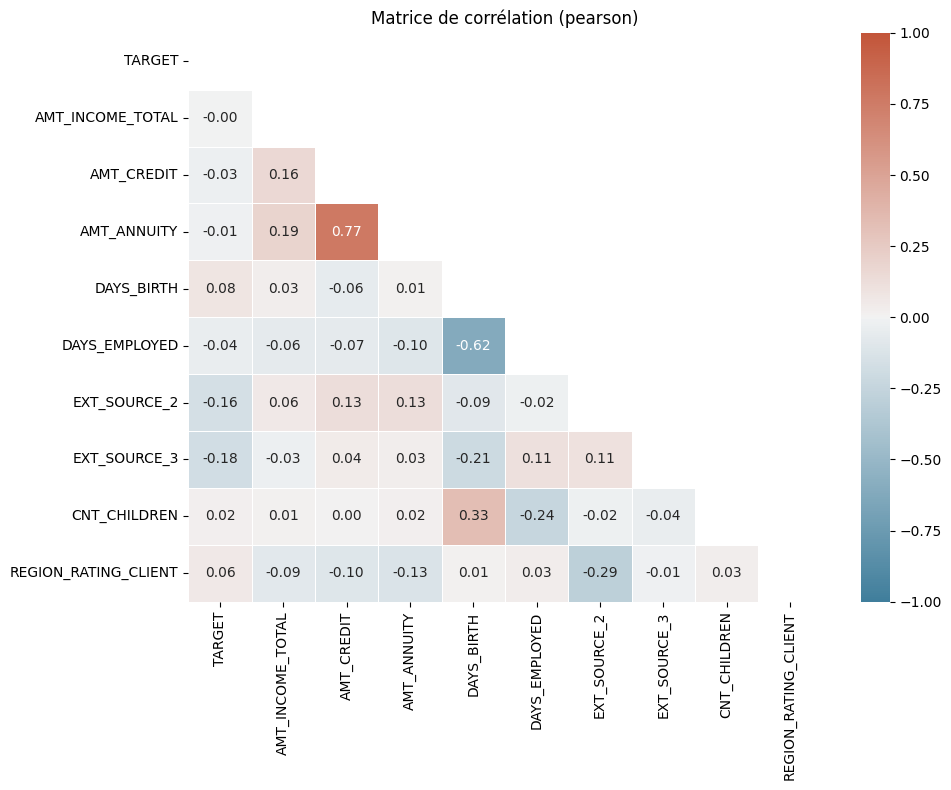

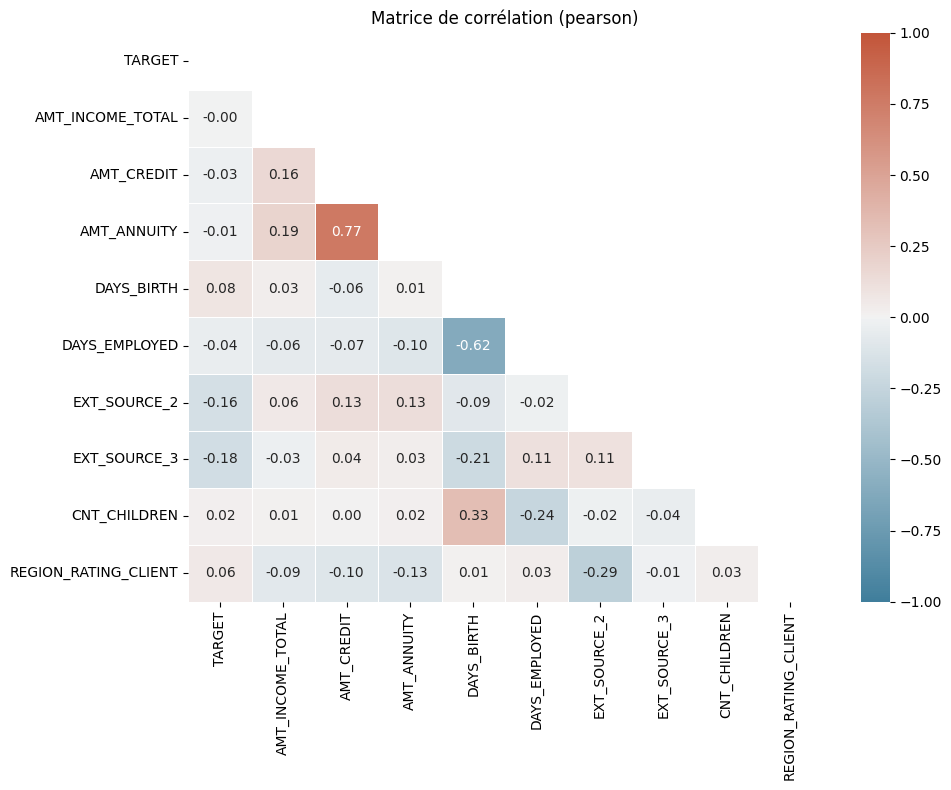

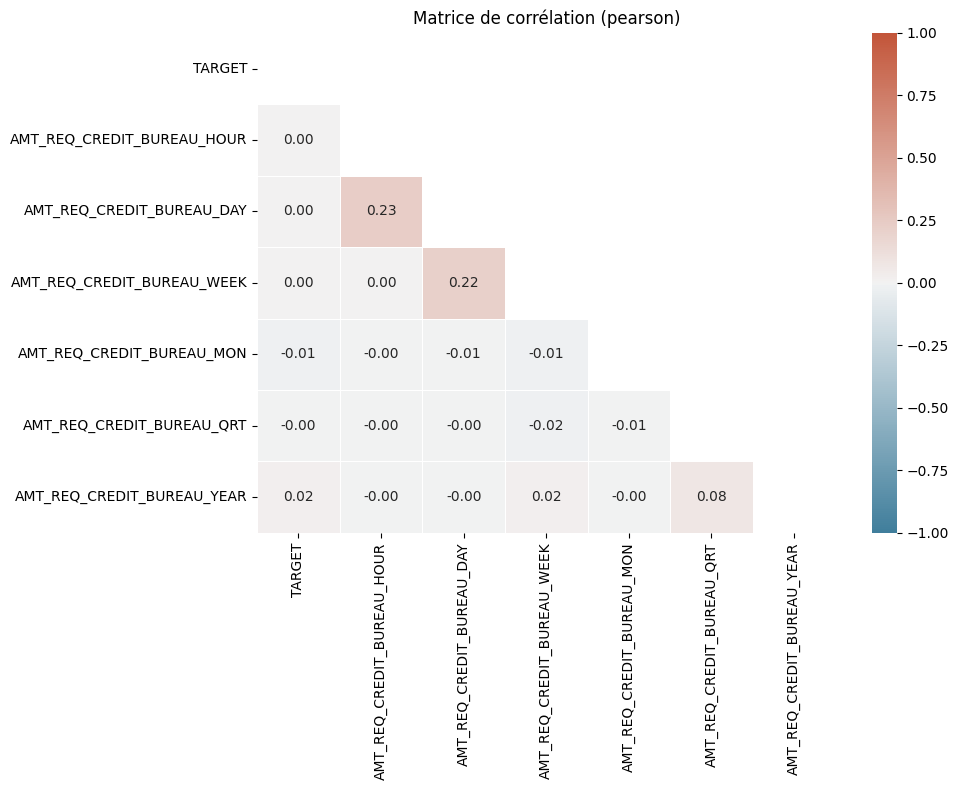

In [19]:
ctot = analyser_correlations(
trainset_v2, 
figsize=(10, 8),
seuil_correlation=0.5,
afficher_heatmap=False
)
# Analyse des corrélations
c1 = analyser_correlations(
trainset_v2, 
variables=variables_importantes,
figsize=(10, 8),
seuil_correlation=0.5
)
c2 = analyser_correlations(
trainset_v2, 
variables=variables_middle,
figsize=(10, 8),
seuil_correlation=0.5
)


c3 = analyser_correlations(
trainset_v2, 
variables=variables_last,
figsize=(10, 8),
seuil_correlation=0.5
)

In [20]:
ctot.head(len(ctot))

,SK_ID_CURR,TARGET,CNT_CHILDREN,CNT_FAM_MEMBERS,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_WORK_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.002895,-0.001500,-0.001820,0.001366,-0.000343,-0.000433,-0.000232,...,-0.000415,0.000281,-0.001075,-0.001138,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,0.009308,0.078239,-0.003982,-0.044932,-0.030369,-0.012817,-0.039645,...,0.028524,-0.001758,0.058899,0.060893,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.879161,0.330938,0.012882,-0.239818,0.002145,0.021374,-0.001827,...,0.055630,0.022619,0.025423,0.024781,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
CNT_FAM_MEMBERS,-0.002895,0.009308,0.879161,1.000000,0.278894,0.016342,-0.233549,0.063160,0.075539,0.061185,...,0.067191,0.018081,0.029688,0.030778,0.000660,-0.001215,-0.001174,-0.008021,-0.004739,-0.028571
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.278894,1.000000,0.027261,-0.615864,-0.055436,0.009445,-0.053442,...,0.172457,0.088208,0.009361,0.008073,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,0.016342,0.027261,1.000000,-0.064223,0.156870,0.191657,0.159610,...,-0.017193,0.038378,-0.085465,-0.091735,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.233549,-0.615864,-0.064223,1.000000,-0.066838,-0.104332,-0.064842,...,-0.233972,-0.062112,0.032750,0.034624,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.063160,-0.055436,0.156870,-0.066838,1.000000,0.770138,0.986968,...,-0.021085,0.016632,-0.101776,-0.110915,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.075539,0.009445,0.191657,-0.104332,0.770138,1.000000,0.775109,...,-0.024803,0.071709,-0.128525,-0.141682,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.061185,-0.053442,0.159610,-0.064842,0.986968,0.775109,1.000000,...,0.001086,0.017048,-0.103786,-0.112208,-0.003237,0.004677,-0.001007,0.056422,0.016432,-0.050998


Ces résultats nous révélent des insights qui nous aideront à construire un modèle de scoring plus performant et plus facile à interpréter.

**Variables à écarter de notre modèle**
    Variables redondantes
- **Nombre de membres de la famille (CNT_FAM_MEMBERS)** : Cette information est presque identique au nombre d'enfants (corrélation de 0,88). Nous garderons uniquement le nombre d'enfants qui est plus simple à comprendre pour évaluer le risque.

- **Montant de l'annuité (AMT_ANNUITY)** ou **Montant du crédit (AMT_CREDIT)** : Ces deux variables sont fortement liées (corrélation de 0,77), ce qui est logique puisque l'annuité dépend directement du montant emprunté. Nous proposons de conserver uniquement le montant du crédit.

- **Note de la région avec ville (REGION_RATING_CLIENT_W_CITY)** : Cette note est presque identique à la note de la région simple (corrélation de 0,95). Une seule de ces deux variables suffit.

    Variables peu informatives
Les variables concernant les demandes de crédit auprès des bureaux de crédit (par heure, jour, semaine, mois, trimestre, année) montrent très peu de lien avec le risque de défaut. Leur faible pouvoir prédictif suggère qu'elles n'apporteront pas beaucoup à notre modèle.

    Identifiants techniques
L'identifiant client (SK_ID_CURR) n'a aucune valeur prédictive et sera bien sûr écarté.

    Variables à conserver prioritairement
Certaines variables montrent un lien plus significatif avec le risque de défaut et méritent notre attention :
- L'âge du client (DAYS_BIRTH)
- L'ancienneté professionnelle (DAYS_EMPLOYED)
- Les scores externes (EXT_SOURCE_2, EXT_SOURCE_3)


Après avoir construit un premier modèle, nous vérifierons l'importance réelle de chaque variable pour affiner notre sélection. Certaines variables initialement écartées pourraient être réintégrées si elles s'avèrent plus importantes que prévu.

Cette approche nous permettra d'obtenir un modèle plus robuste, plus facile à interpréter, et qui évitera les problèmes liés à l'utilisation de variables trop similaires entre elles.

    Remarque Nous pourrions approfondir cette analyse avec des tests statistiques si nécessaire, mais pour le moment on va se fier à ces observations.

In [21]:
# Liste des variables à supprimer
variables_a_supprimer = [
    #'SK_ID_CURR',  # Identifiant technique sans valeur prédictive
    'CNT_FAM_MEMBERS',  # Redondant avec CNT_CHILDREN (corrélation 0.88)
    'AMT_ANNUITY',  # Fortement corrélé avec AMT_CREDIT (corrélation 0.77)
    'REGION_RATING_CLIENT_W_CITY',  # Presque identique à REGION_RATING_CLIENT (corrélation 0.95)
    # Variables peu informatives concernant les demandes de crédit
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

trainset_v3 = trainset_v2.drop(columns=variables_a_supprimer)

print(f"Dimensions de trainset_v3: {trainset_v3.shape}")
print(f"Nombre de variables supprimées: {len(variables_a_supprimer)}")
print(f"Variables conservées prioritairement: \n DAYS_BIRTH, \n DAYS_EMPLOYED, \n EXT_SOURCE_2, \n EXT_SOURCE_3")


Dimensions de trainset_v3: (307511, 27)
Nombre de variables supprimées: 9
Variables conservées prioritairement: 
 DAYS_BIRTH, 
 DAYS_EMPLOYED, 
 EXT_SOURCE_2, 
 EXT_SOURCE_3


In [22]:
variables_numeriques = trainset_v3.select_dtypes(include=['float64', 'int64']).columns.tolist()
variables_numeriques
variables_categorie = trainset_v3.select_dtypes(include=['object']).columns.tolist()
variables_categorie


['CODE_GENDER',
 'NAME_FAMILY_STATUS',
 'NAME_EDUCATION_TYPE',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY']

# Analyse des variables catégorielles

Nous allons maintenant analyser les variables catégorielles suivantes:
- CODE_GENDER: Genre du client
- NAME_FAMILY_STATUS: Statut familial
- NAME_EDUCATION_TYPE: Niveau d'éducation
- NAME_HOUSING_TYPE: Type de logement
- NAME_INCOME_TYPE: Type de revenu
- OCCUPATION_TYPE: Type d'occupation/profession
- ORGANIZATION_TYPE: Type d'organisation employeur
- NAME_CONTRACT_TYPE: Type de contrat
- FLAG_OWN_CAR: Possession d'une voiture
- FLAG_OWN_REALTY: Possession d'un bien immobilier

Ces variables peuvent avoir une influence significative sur le risque de défaut de paiement.


In [23]:
# Définir une fonction qui permet d'analyser les variables catégorielles
def analyser_variable_categorielle(df, variable, target='TARGET', explication=False, affichage='both'):
    """
    Analyse une variable catégorielle en relation avec la variable cible.
    
    Args:
        df: DataFrame contenant les données
        variable: Nom de la variable catégorielle à analyser
        target: Nom de la variable cible (défaut: 'TARGET')
        explication: Booléen pour afficher les explications sur le taux de défaut
        affichage: Type d'affichage ('both', 'figure', 'table')
    Returns:
        DataFrame avec les statistiques par catégorie
    """
    # Calculer le taux de défaut par catégorie
    stats = df.groupby(variable)[target].agg(['count', 'mean']).reset_index()
    stats.columns = [variable, 'Nombre', 'Taux_Defaut']
    # Le taux de défaut représente la proportion de clients en défaut de paiement (TARGET=1)
    stats['Pourcentage'] = stats['Nombre'] / stats['Nombre'].sum() * 100
    
    # Trier par nombre décroissant pour la table
    stats = stats.sort_values('Nombre', ascending=False)
    
    # Ajouter une colonne plus explicite pour le taux de défaut
    stats['Pourcentage_Defaut'] = stats['Taux_Defaut'] * 100
    
    # Visualisation
    if affichage in ['both', 'figure']:
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        
        # Configuration pour éviter les avertissements FutureWarning
        import warnings
        warnings.filterwarnings("ignore", category=FutureWarning)
        
        # Distribution des catégories 
        sns.barplot(x=variable, y='Nombre', data=stats, ax=ax[0])
        ax[0].set_title(f'Distribution de {variable}')
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right')
        
        # Taux de défaut par catégorie
        taux_defaut_plot = stats.sort_values('Taux_Defaut', ascending=False).copy()
        sns.barplot(x=variable, y='Pourcentage_Defaut', data=taux_defaut_plot, ax=ax[1])
        ax[1].set_title(f'Pourcentage de défaut par {variable}')
        ax[1].set_ylabel('Pourcentage de défaut (%)')
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
        ax[1].axhline(df[target].mean() * 100, color='red', linestyle='--', label='Taux moyen de défaut')
        ax[1].legend()
        
        plt.tight_layout()
        plt.show()
    
    if explication:
        print("=============================================================================================================")
        print(f"======  Le taux de défaut représente le pourcentage de clients qui n'ont pas remboursé leur prêt (TARGET=1).")
        print(f"======  Un taux de défaut de 10% signifie que 10% des clients de cette catégorie sont en défaut de paiement.")
        print("=============================================================================================================")
    
    return stats


Analyse de CODE_GENDER

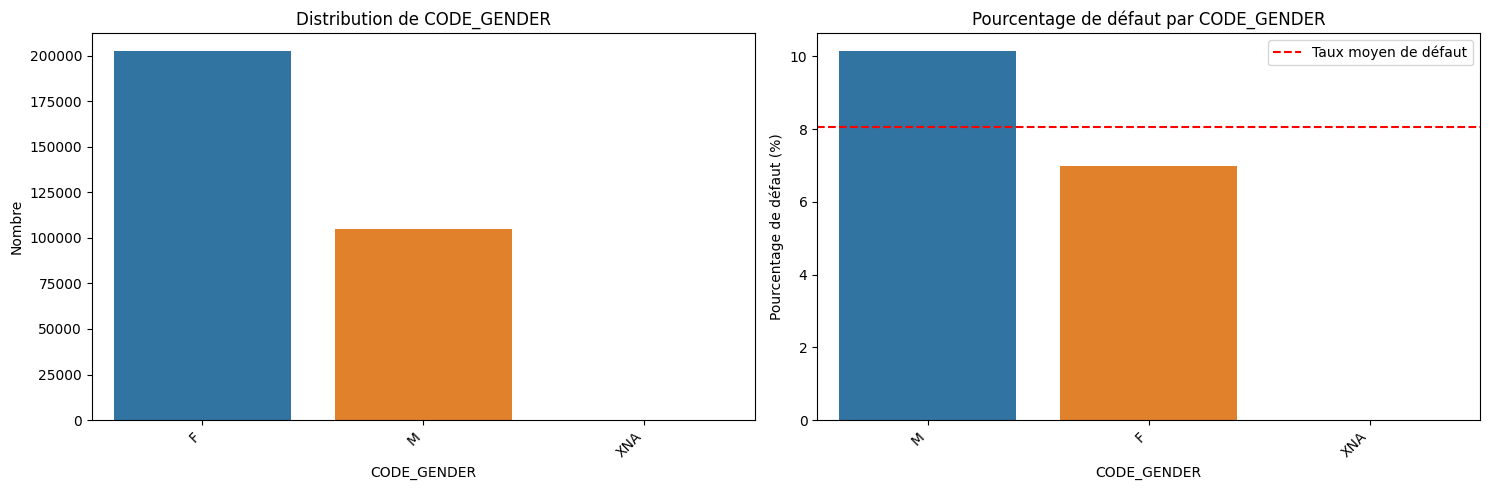

  CODE_GENDER  Nombre  Taux_Defaut  Pourcentage  Pourcentage_Defaut
0           F  202448     0.069993    65.834393            6.999328
1           M  105059     0.101419    34.164306           10.141920
2         XNA       4     0.000000     0.001301            0.000000

Analyse de NAME_FAMILY_STATUS


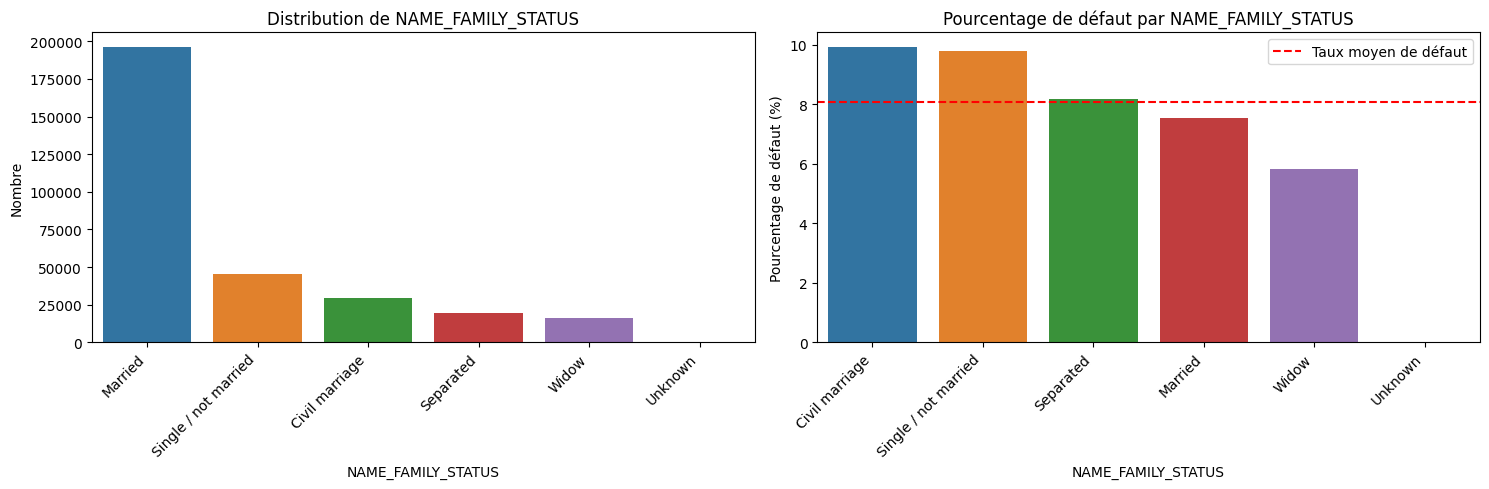

     NAME_FAMILY_STATUS  Nombre  Taux_Defaut  Pourcentage  Pourcentage_Defaut
1               Married  196432     0.075599    63.878040            7.559868
3  Single / not married   45444     0.098077    14.778008            9.807675
0        Civil marriage   29775     0.099446     9.682580            9.944584
2             Separated   19770     0.081942     6.429038            8.194234
5                 Widow   16088     0.058242     5.231683            5.824217
4               Unknown       2     0.000000     0.000650            0.000000

Analyse de NAME_EDUCATION_TYPE


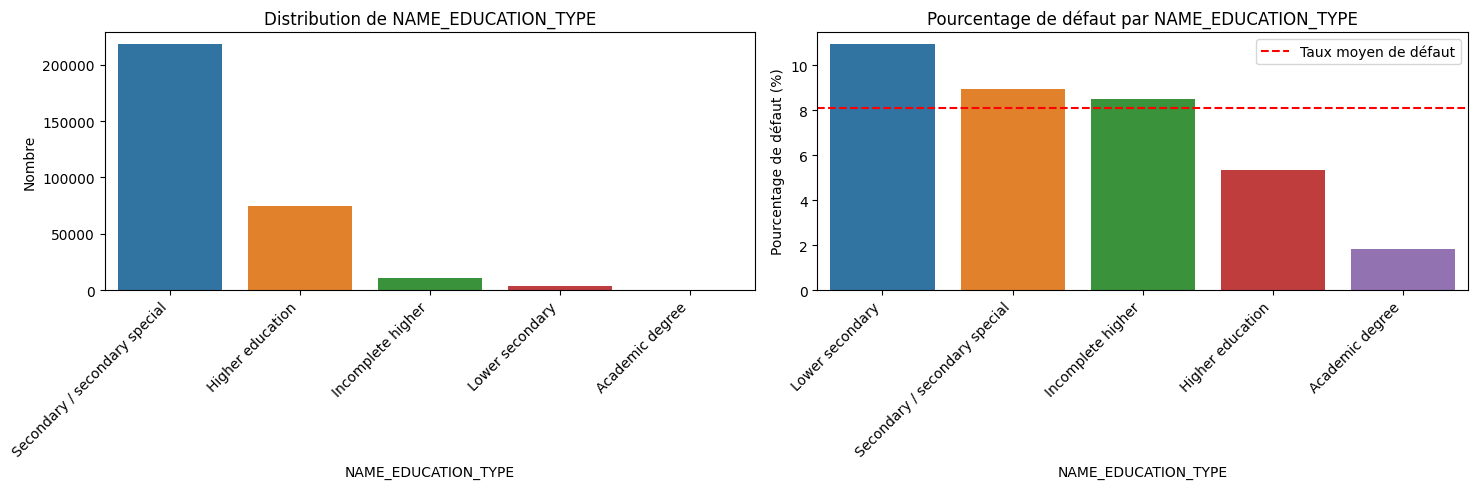

             NAME_EDUCATION_TYPE  Nombre  Taux_Defaut  Pourcentage  \
4  Secondary / secondary special  218391     0.089399    71.018923   
1               Higher education   74863     0.053551    24.344820   
2              Incomplete higher   10277     0.084850     3.341994   
3                Lower secondary    3816     0.109277     1.240931   
0                Academic degree     164     0.018293     0.053331   

   Pourcentage_Defaut  
4            8.939929  
1            5.355115  
2            8.484966  
3           10.927673  
0            1.829268  

Analyse de NAME_HOUSING_TYPE


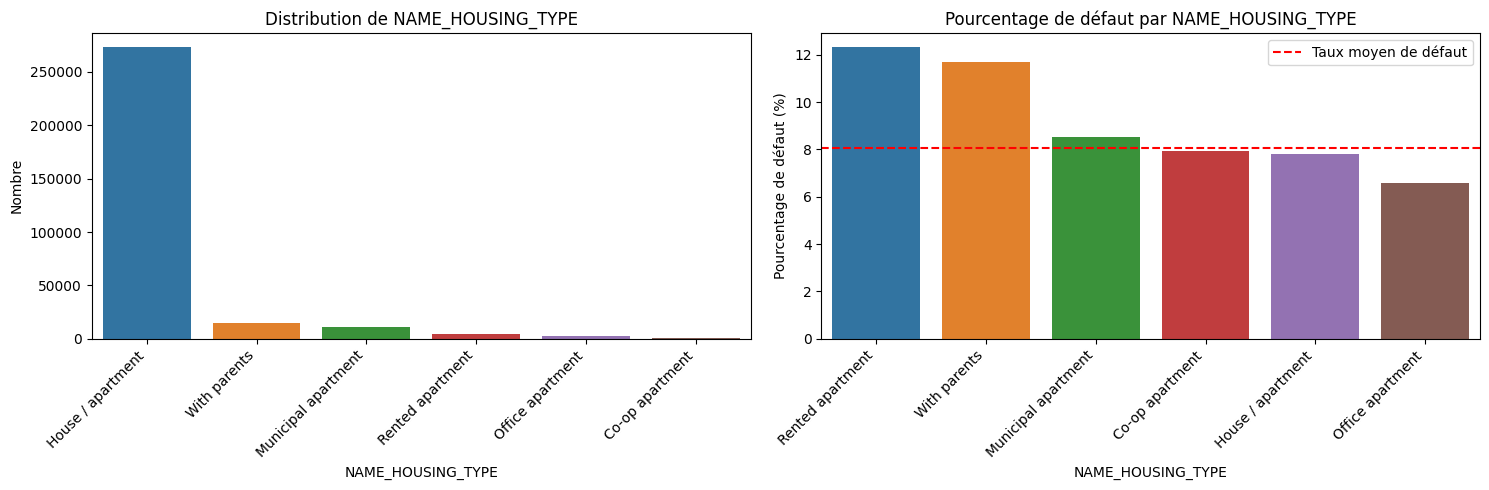

     NAME_HOUSING_TYPE  Nombre  Taux_Defaut  Pourcentage  Pourcentage_Defaut
1    House / apartment  272868     0.077957    88.734387            7.795711
5         With parents   14840     0.116981     4.825844           11.698113
2  Municipal apartment   11183     0.085397     3.636618            8.539748
4     Rented apartment    4881     0.123131     1.587260           12.313051
3     Office apartment    2617     0.065724     0.851026            6.572411
0      Co-op apartment    1122     0.079323     0.364865            7.932264

Analyse de NAME_INCOME_TYPE


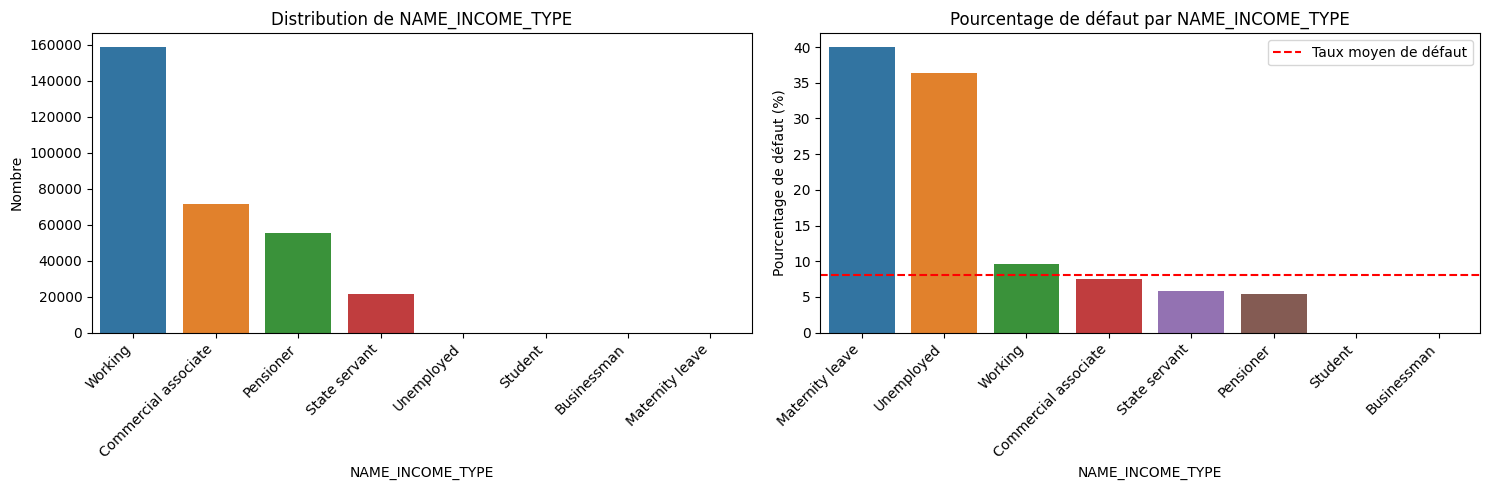

       NAME_INCOME_TYPE  Nombre  Taux_Defaut  Pourcentage  Pourcentage_Defaut
7               Working  158774     0.095885    51.631974            9.588472
1  Commercial associate   71617     0.074843    23.289248            7.484257
3             Pensioner   55362     0.053864    18.003258            5.386366
4         State servant   21703     0.057550     7.057634            5.754965
6            Unemployed      22     0.363636     0.007154           36.363636
5               Student      18     0.000000     0.005853            0.000000
0           Businessman      10     0.000000     0.003252            0.000000
2       Maternity leave       5     0.400000     0.001626           40.000000

Analyse de OCCUPATION_TYPE


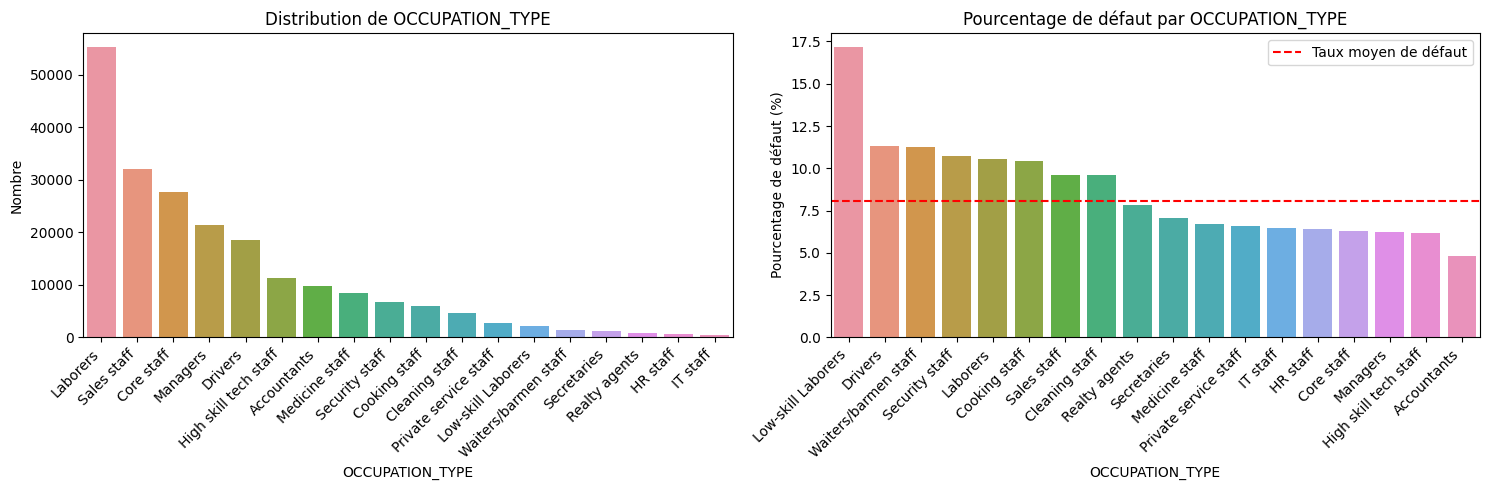

          OCCUPATION_TYPE  Nombre  Taux_Defaut  Pourcentage  \
8                Laborers   55186     0.105788    26.139636   
14            Sales staff   32102     0.096318    15.205570   
3              Core staff   27570     0.063040    13.058924   
10               Managers   21371     0.062140    10.122679   
4                 Drivers   18603     0.113261     8.811576   
6   High skill tech staff   11380     0.061599     5.390299   
0             Accountants    9813     0.048303     4.648067   
11         Medicine staff    8537     0.067002     4.043672   
16         Security staff    6721     0.107424     3.183498   
2           Cooking staff    5946     0.104440     2.816408   
1          Cleaning staff    4653     0.096067     2.203960   
12  Private service staff    2652     0.065988     1.256158   
9      Low-skill Laborers    2093     0.171524     0.991379   
17   Waiters/barmen staff    1348     0.112760     0.638499   
15            Secretaries    1305     0.070498     0.61

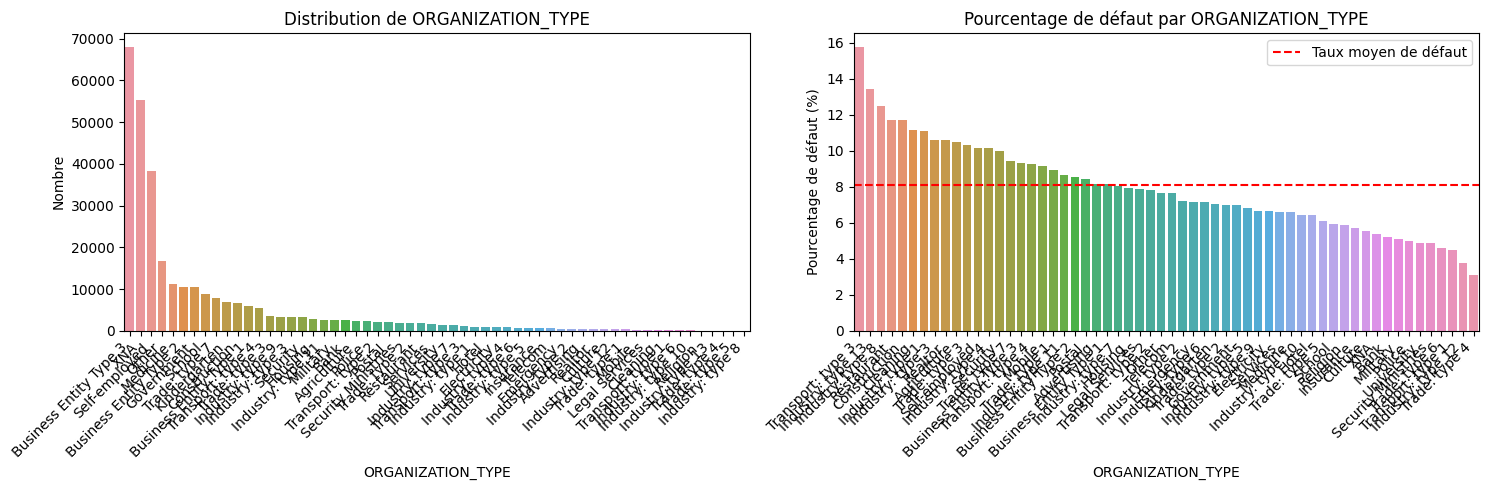

         ORGANIZATION_TYPE  Nombre  Taux_Defaut  Pourcentage  \
5   Business Entity Type 3   67992     0.092996    22.110429   
57                     XNA   55374     0.053996    18.007161   
42           Self-employed   38412     0.101739    12.491260   
33                   Other   16683     0.076425     5.425172   
30                Medicine   11193     0.065845     3.639870   
4   Business Entity Type 2   10553     0.085284     3.431747   
11              Government   10404     0.069781     3.383294   
39                  School    8893     0.059148     2.891929   
51           Trade: type 7    7831     0.094496     2.546576   
28            Kindergarten    6880     0.070349     2.237318   
7             Construction    6721     0.116798     2.185613   
3   Business Entity Type 1    5984     0.081384     1.945947   
55       Transport: type 4    5398     0.092812     1.755384   
47           Trade: type 3    3492     0.103379     1.135569   
26        Industry: type 9    3368     0

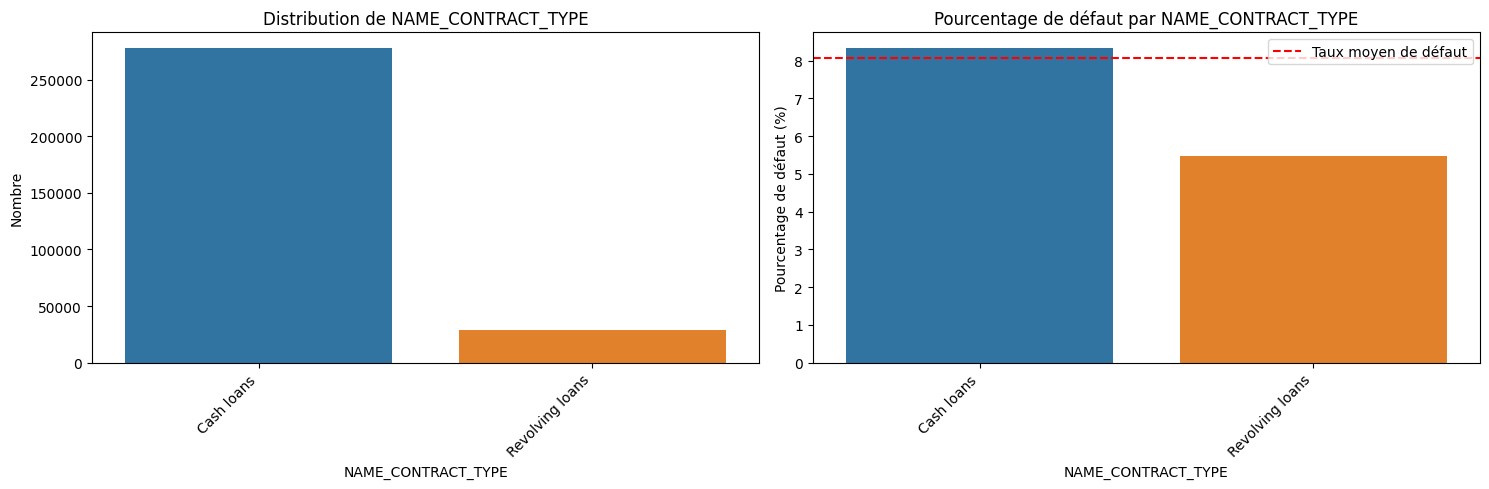

  NAME_CONTRACT_TYPE  Nombre  Taux_Defaut  Pourcentage  Pourcentage_Defaut
0         Cash loans  278232     0.083459    90.478715            8.345913
1    Revolving loans   29279     0.054783     9.521285            5.478329

Analyse de FLAG_OWN_CAR


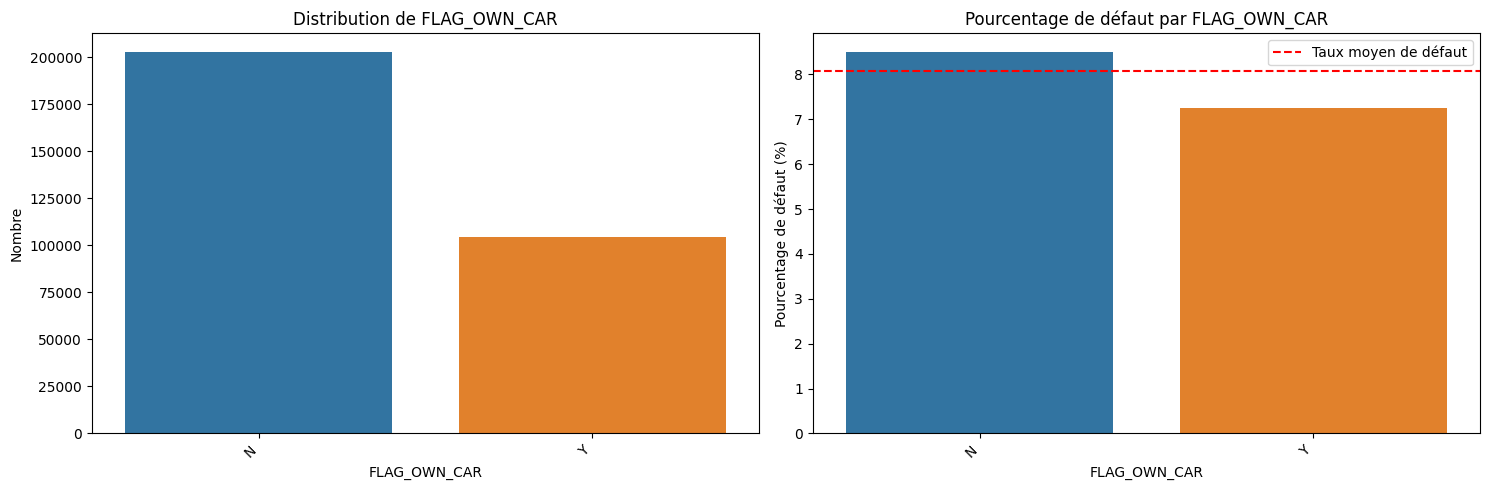

  FLAG_OWN_CAR  Nombre  Taux_Defaut  Pourcentage  Pourcentage_Defaut
0            N  202924     0.085002    65.989184            8.500227
1            Y  104587     0.072437    34.010816            7.243730

Analyse de FLAG_OWN_REALTY


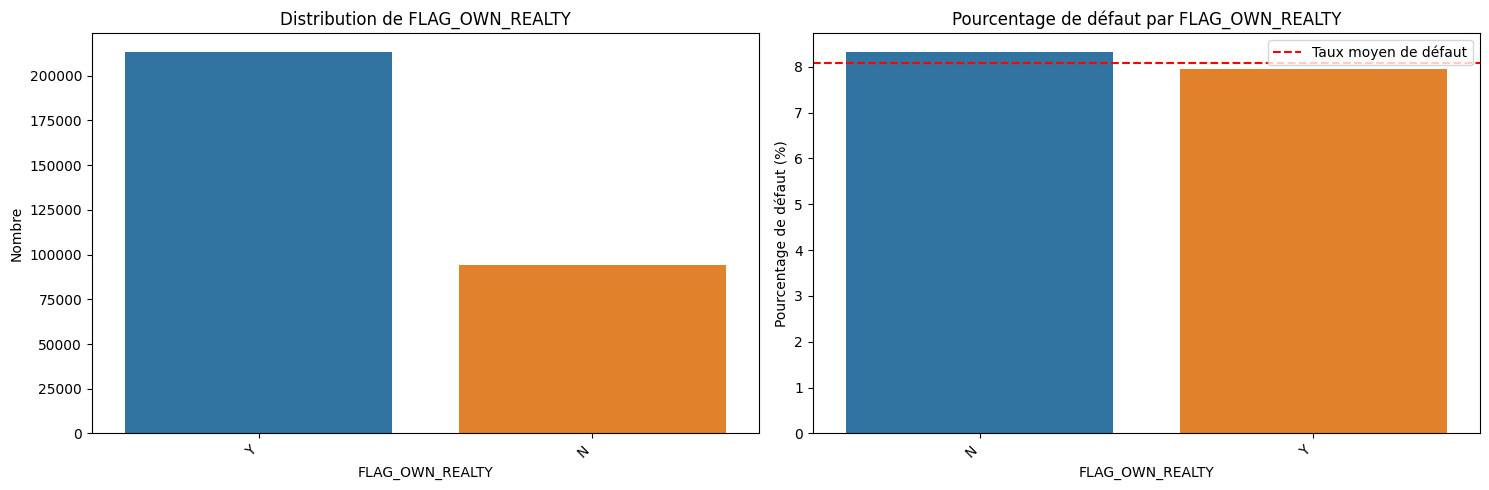

  FLAG_OWN_REALTY  Nombre  Taux_Defaut  Pourcentage  Pourcentage_Defaut
1               Y  213312     0.079616    69.367275            7.961577
0               N   94199     0.083249    30.632725            8.324929


In [24]:
for var in variables_categorie:
    print(f"\nAnalyse de {var}")
    stats = analyser_variable_categorielle(trainset_v3, var)
    print(stats)


Analyse et décisions sur les variables catégorielles.

CODE_GENDER
- Les hommes (M) représentent 34% des clients mais ont un taux de défaut plus élevé (10.14%) que les femmes (7%)
- Variable à conserver car différence significative dans les taux de défaut

NAME_FAMILY_STATUS
- Les personnes mariées représentent 64% des clients avec un taux de défaut moyen (7.56%)
- Les célibataires et unions civiles ont des taux de défaut plus élevés (~9.8%)
- Les veufs/veuves ont le taux de défaut le plus bas (5.82%)
- Variable à conserver car discriminante pour le risque

NAME_EDUCATION_TYPE
- 71% des clients ont une éducation secondaire avec un taux de défaut de 8.94%
- L'éducation supérieure (24% des clients) montre un taux de défaut plus faible (5.36%)
- Les niveaux d'éducation inférieurs ont des taux de défaut plus élevés
- Variable très pertinente à conserver

NAME_HOUSING_TYPE
- 89% vivent en appartement/maison avec un taux de défaut de 7.8%
- Les personnes en location ou vivant chez leurs parents ont des taux de défaut significativement plus élevés (>11%)
- Variable à conserver car indicative de stabilité financière

NAME_INCOME_TYPE
- Les travailleurs actifs représentent 52% avec un taux de défaut de 9.59%
- Les retraités et fonctionnaires ont des taux de défaut plus bas (~5.5%)
- Les chômeurs et personnes en congé maternité ont des taux très élevés (>36%)
- Variable très discriminante à conserver

OCCUPATION_TYPE
- Les ouvriers et chauffeurs ont des taux de défaut élevés (>10%)
- Les professions qualifiées (comptables, managers) ont des taux plus bas (<6.5%)
- Variable pertinente à conserver malgré 31% de valeurs manquantes

ORGANIZATION_TYPE
- Grande variabilité des taux de défaut selon le secteur d'activité
- Les secteurs comme la construction, la restauration et certains types de transport montrent des taux de défaut >11%
- Variable à conserver mais à regrouper potentiellement en catégories plus larges

NAME_CONTRACT_TYPE
- 90% sont des prêts en espèces avec un taux de défaut de 8.35%
- Les prêts renouvelables ont un taux de défaut plus faible (5.48%)
- Variable à conserver car différence significative (que l'on peut certifier à l'aide de test statistique)

FLAG_OWN_CAR et FLAG_OWN_REALTY
- Légère différence dans les taux de défaut
- Variables à conserver comme indicateurs de patrimoine

Au vu des résultats, toutes ces variables catégorielles seront conservées pour la modélisation car elles présentent des différences significatives dans les taux de défaut entre leurs modalités.



    Analyse des variables numzriques si j'ai le temps

In [65]:
# maintenant explorons trainset_v3
# Afficher le % de valeurs manquantes par colonne
print("================================================")
print("     % de valeurs manquantes par colonne")
print("================================================")
na_percent = (trainset_v3.isnull().sum() / len(trainset_v3)) * 100
na_percent = na_percent.sort_values(ascending=False)
print(na_percent.head(10))  

print("================================================")
print("Nombre de lignes et de colonnes")
print("================================================")
print(trainset_v3.shape)

     % de valeurs manquantes par colonne
OCCUPATION_TYPE    31.345545
EXT_SOURCE_3       19.825307
EXT_SOURCE_2        0.214626
AMT_GOODS_PRICE     0.090403
SK_ID_CURR          0.000000
FLAG_EMAIL          0.000000
FLAG_WORK_PHONE     0.000000
FLAG_EMP_PHONE      0.000000
FLAG_MOBIL          0.000000
FLAG_OWN_REALTY     0.000000
dtype: float64
Nombre de lignes et de colonnes
(307511, 27)


Interprétation des résultats:

- OCCUPATION_TYPE présente le plus haut taux de valeurs manquantes (31.35%)
- EXT_SOURCE_3 a également un taux élevé de valeurs manquantes (19.83%)
- EXT_SOURCE_2 et AMT_GOODS_PRICE ont très peu de valeurs manquantes (<0.22%)
- Les autres variables affichées n'ont aucune valeur manquante

Le jeu de données nettoyé contient 307,511 lignes et 27 colonnes, ce qui représente une réduction significative par rapport aux 122 colonnes d'origine tout en conservant toutes les observations.


In [ ]:
# D'après l'analyse précédente, nous avons 4 variables avec des valeurs manquantes:

# Examinons la distribution de ces variables pour déterminer la meilleure stratégie d'imputation
print("================================================")
print("Analyse des valeurs manquantes")
print("================================================")

# Vérifions le type de chaque variable avec valeurs manquantes
cols_with_na = na_percent[na_percent > 0].index.tolist()
print("le nombre de colonnes avec des valeurs manquantes est de :", len(cols_with_na))
print(f"Types des variables avec valeurs manquantes:")
print(trainset_v3[cols_with_na].dtypes)

# Statistiques descriptives pour les variables numériques avec NA
numeric_na_cols = [col for col in cols_with_na if trainset_v3[col].dtype in ['float64', 'int64']]
if numeric_na_cols:
    print("\nStatistiques des variables numériques avec NA:")
    print(trainset_v3[numeric_na_cols].describe())


Analyse des valeurs manquantes
le nombre de colonnes avec des valeurs manquantes est de : 4
Types des variables avec valeurs manquantes:
OCCUPATION_TYPE     object
EXT_SOURCE_3       float64
EXT_SOURCE_2       float64
AMT_GOODS_PRICE    float64
dtype: object

Statistiques des variables numériques avec NA:
        EXT_SOURCE_3  EXT_SOURCE_2  AMT_GOODS_PRICE
count  246546.000000  3.068510e+05     3.072330e+05
mean        0.510853  5.143927e-01     5.383962e+05
std         0.194844  1.910602e-01     3.694465e+05
min         0.000527  8.173617e-08     4.050000e+04
25%         0.370650  3.924574e-01     2.385000e+05
50%         0.535276  5.659614e-01     4.500000e+05
75%         0.669057  6.636171e-01     6.795000e+05
max         0.896010  8.549997e-01     4.050000e+06


Stratégie de gestion des valeurs manquantes:

1. OCCUPATION_TYPE (variable catégorielle):
   - Création d'une catégorie "Unknown" pour les valeurs manquantes

2. Variables numériques (EXT_SOURCE_2, EXT_SOURCE_3, AMT_GOODS_PRICE):
   - Imputation par la médiane pour conserver la distribution
   - La médiane est préférable à la moyenne car moins sensible aux valeurs extrêmes
   - Création de variables indicatrices pour marquer les valeurs qui étaient manquantes


In [76]:
# Implémentation de la stratégie de gestion des valeurs manquantes
print("================================================")
print("Imputation des valeurs manquantes")
print("================================================")

# Création d'une copie du dataframe pour préserver l'original
trainset_v4 = trainset_v3.copy()

# 1. Gestion de OCCUPATION_TYPE (variable catégorielle)
trainset_v4['OCCUPATION_TYPE'] = trainset_v4['OCCUPATION_TYPE'].fillna('Unknown')
print("OCCUPATION_TYPE: Valeurs manquantes remplacées par 'Unknown'")

# 2. Gestion des variables numériques (EXT_SOURCE_2, EXT_SOURCE_3, AMT_GOODS_PRICE)
numeric_na_cols = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'AMT_GOODS_PRICE']

# Création des variables indicatrices et imputation par la médiane en une seule boucle
for col in numeric_na_cols:
    # Création d'une variable indicatrice pour marquer les valeurs manquantes
    trainset_v4[f'{col}_NA'] = trainset_v4[col].isna().astype(int)
    
    # Imputation par la médiane
    median_value = trainset_v4[col].median()
    trainset_v4[col].fillna(median_value, inplace=True)
    print(f"{col}: Valeurs manquantes imputées par la médiane ({median_value:.4f})")

# Vérification
na_count = trainset_v4.isna().sum().sum()
print(f"\nNombre total de valeurs manquantes après imputation: {na_count}")
if na_count == 0:
    print(" Toutes les valeurs manquantes ont été traitées")
else:
    print(" Il reste des valeurs manquantes à traiter")



Imputation des valeurs manquantes
OCCUPATION_TYPE: Valeurs manquantes remplacées par 'Unknown'
EXT_SOURCE_2: Valeurs manquantes imputées par la médiane (0.5660)
EXT_SOURCE_3: Valeurs manquantes imputées par la médiane (0.5353)
AMT_GOODS_PRICE: Valeurs manquantes imputées par la médiane (450000.0000)

Nombre total de valeurs manquantes après imputation: 0
 Toutes les valeurs manquantes ont été traitées


In [80]:
# Affichage de la répartition des NAs sur trainset_v4 avec pourcentage
print("================================================")
print("Répartition des NAs sur trainset_v4")
print("================================================")
na_count = trainset_v4.isna().sum()
na_percent = (trainset_v4.isna().sum() / len(trainset_v4)) * 100
na_df = pd.DataFrame({'Nombre de NA': na_count, 'Pourcentage (%)': na_percent})
print(na_df[na_df['Nombre de NA'] > 0])  # Afficher uniquement les colonnes avec des NA
print("================================================")


Répartition des NAs sur trainset_v4
Empty DataFrame
Columns: [Nombre de NA, Pourcentage (%)]
Index: []


    Maintenant, notre dataset, n'a plus de NA

In [77]:
print("================================================")
print("Liste des colonnes catégorielle")
print("================================================")
pprint(trainset_v3.select_dtypes(include=['object']).columns)
print("================================================")
print("Liste des colonnes numériques")
print("================================================")
print(trainset_v3.select_dtypes(include=['float64', 'int64']).columns)

Liste des colonnes catégorielle
Index(['CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY'],
      dtype='object')
Liste des colonnes numériques
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH',
       'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT'],
      dtype='object')
